# Linear regression using `statsmodels`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

Read in the [Wine Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) dataset.

In [2]:
wines = pd.read_csv('datasets/wine-quality.csv', sep=';')

Drop the `density` and `quality` columns.

In [3]:
wines.drop(columns=['density', 'quality'], inplace=True)

Replace all spaces in the column names with underscores.

In [4]:
wines.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

Perform some basic data exploration.

In [5]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,3.820000,1.080000,14.200000


Explore the data visually.

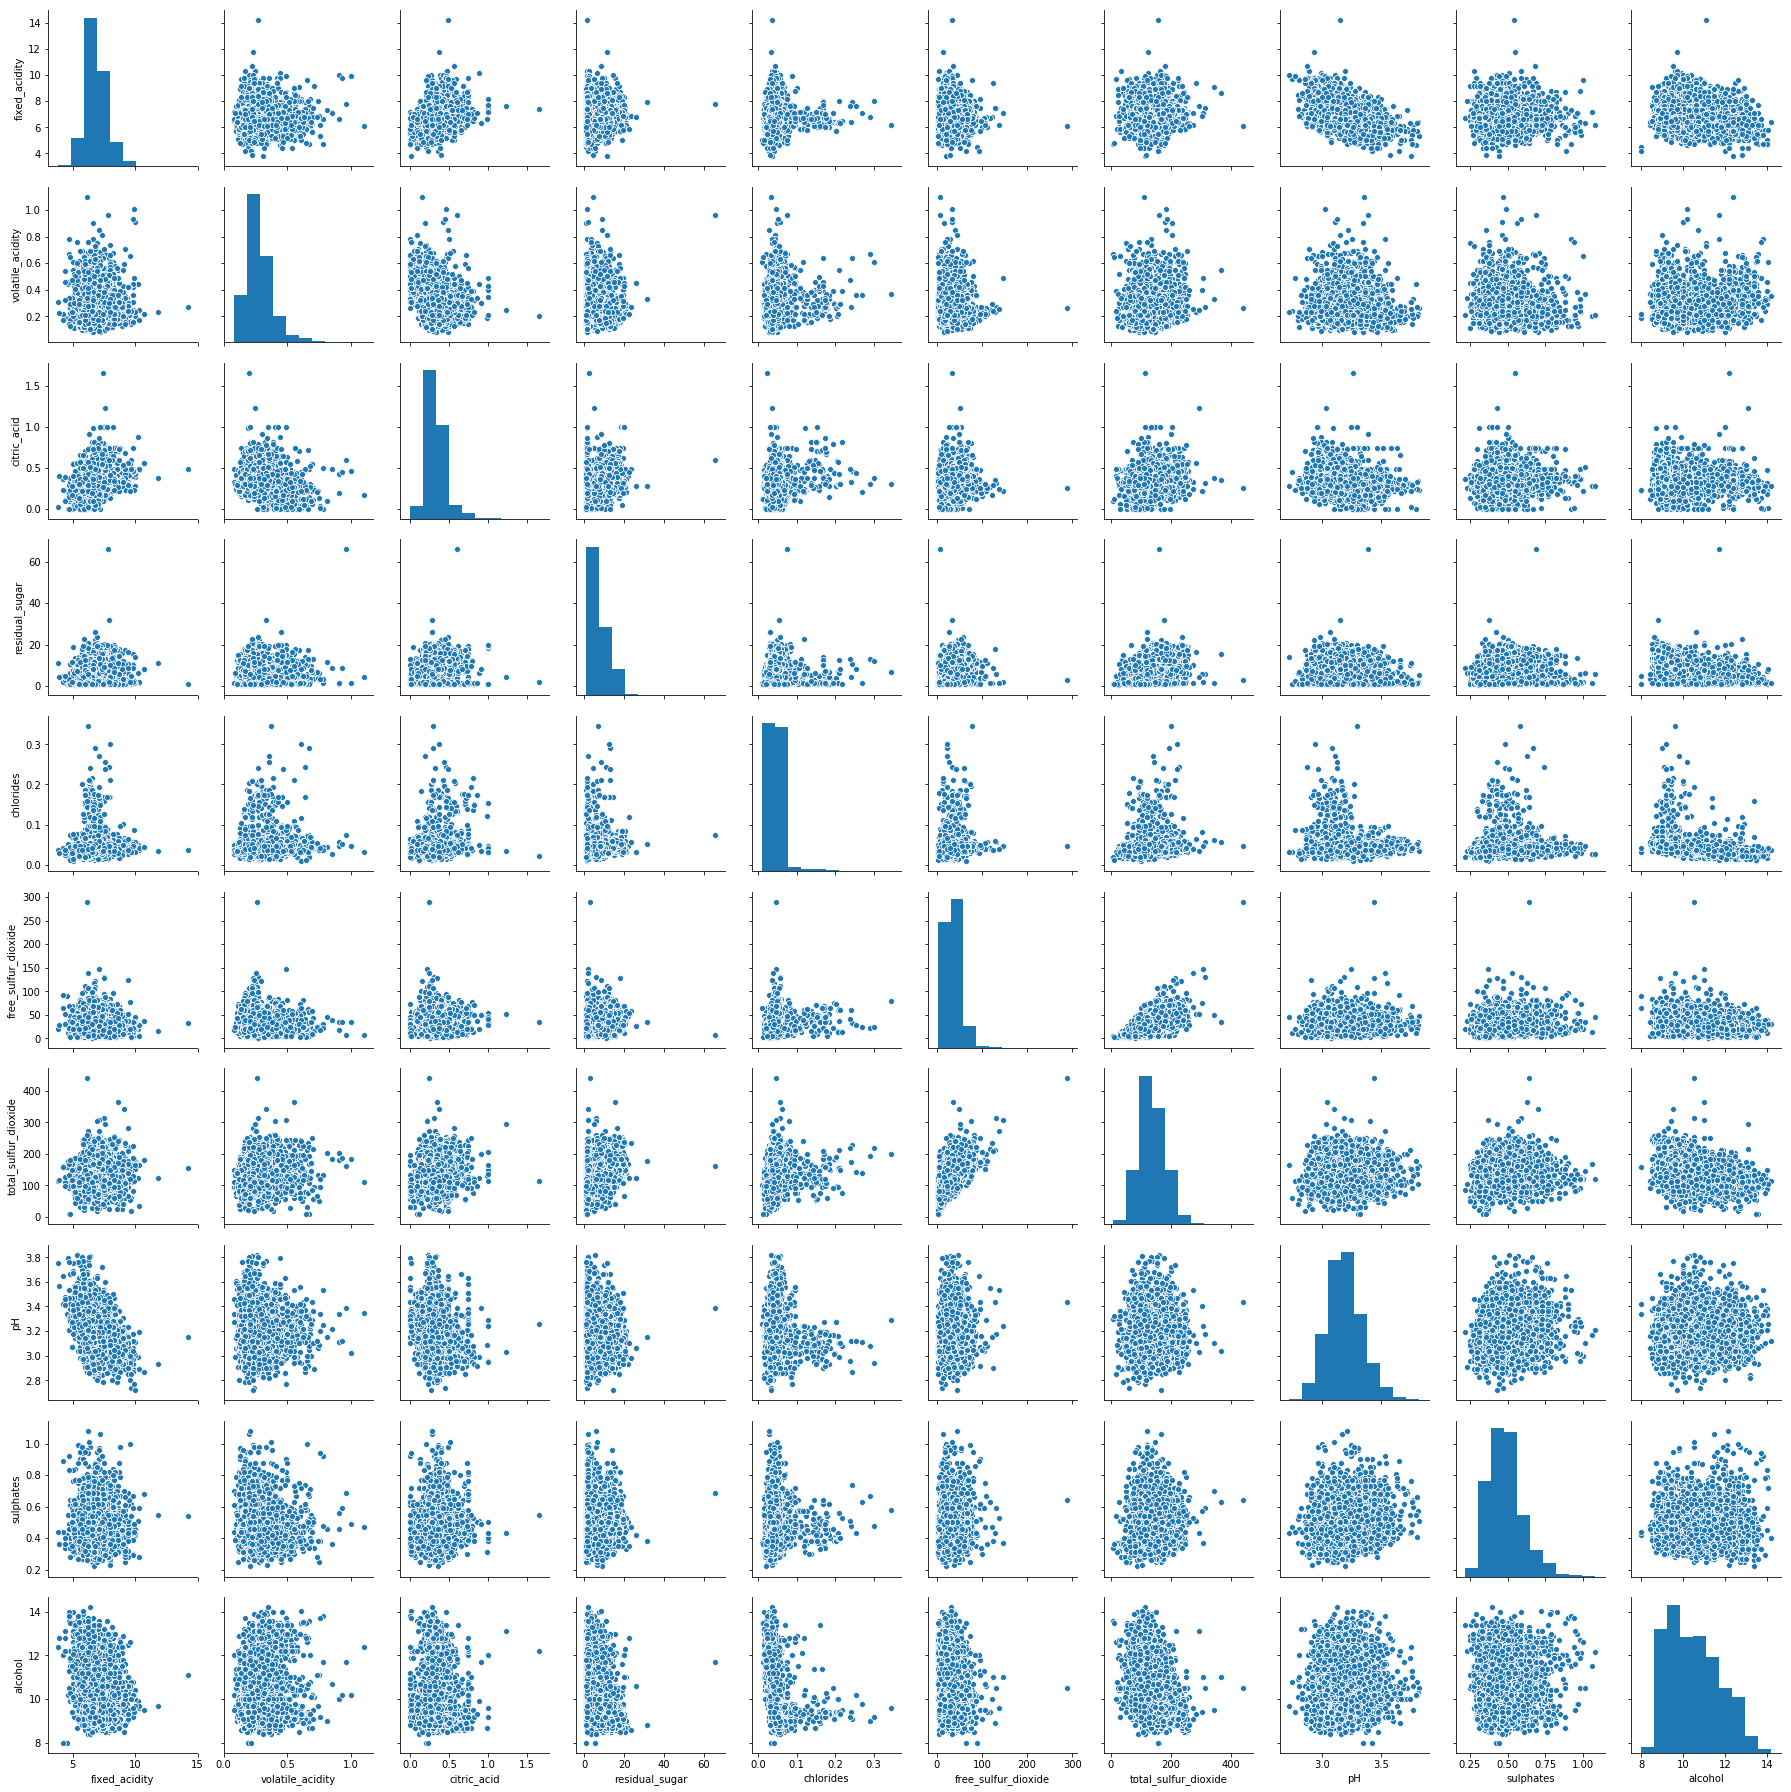

In [7]:
sns.pairplot(wines)

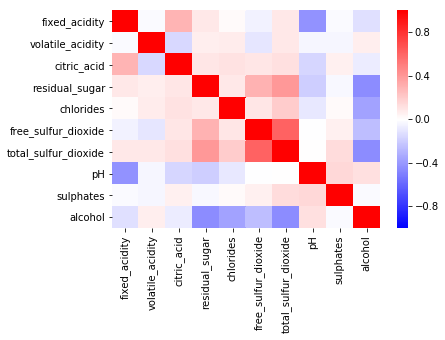

In [9]:
sns.heatmap(wines.corr(), vmin=-1, vmax=1, cmap='bwr')

Fit a linear regression model for `alcohol` using all predictors.

In [10]:
formula = 'alcohol ~ ' + ' + '.join(x for x in wines.columns if x != 'alcohol')
model_full = smf.ols(formula, data=wines).fit()

Print out and interpret the regression coefficients.

In [11]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     351.5
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:50:43   Log-Likelihood:                -6743.8
No. Observations:                4898   AIC:                         1.351e+04
Df Residuals:                    4888   BIC:                         1.357e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.0169      0.407     29.505      0.000      11.218      12.815
fixed_acidity           -0.0806      0.019     -4.267      0.000      -0.118      -0.044
volatile_acidity         1.9099      0.142     13.457      0.000       1.632       2.188
citric_acid              0.6314      0.122      5.188      0.000       0.393       0.870
residual_sugar          -0.0784      0.003    -25.803      0.000      -0.084      -0.072
chlorides              -16.2798      0.648    -25.117      0.000     -17.550     -15.009
free_sulfur_dioxide      0.0063      0.001      5.934      0.000       0.004       0.008
total_sulfur_dioxide    -0.0097      0.000    -21.346      0.000      -0.011      -0.009
pH                       0.1836      0.105      1.753      0.080      -0.022       0.389
sulphates                0.1706      0.124      1.381      0.167      -0.072       0.413
==============================================================================
Omnibus:                      109.236   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.804
Skew:                           0.354   Prob(JB):                     2.63e-26
Kurtosis:                       3.276   Cond. No.                     7.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Drop predictors that are not statistically significant ($p > 0.05$).

In [12]:
cols_excluded = {'alcohol'} | (set(model_full.pvalues.index[model_full.pvalues > 0.05]) - {'Intercept'})
formula = 'alcohol ~ ' + ' + '.join(x for x in wines.columns if x not in cols_excluded)
model_sig = smf.ols(formula, data=wines).fit()

In [13]:
model_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     450.7
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:50:56   Log-Likelihood:                -6746.7
No. Observations:                4898   AIC:                         1.351e+04
Df Residuals:                    4890   BIC:                         1.356e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.7844      0.127    100.276      0.000      12.534      13.034
fixed_acidity           -0.0954      0.017     -5.536      0.000      -0.129      -0.062
volatile_acidity         1.8869      0.142     13.320      0.000       1.609       2.165
citric_acid              0.6321      0.121      5.206      0.000       0.394       0.870
residual_sugar          -0.0798      0.003    -26.847      0.000      -0.086      -0.074
chlorides              -16.4007      0.645    -25.408      0.000     -17.666     -15.135
free_sulfur_dioxide      0.0061      0.001      5.780      0.000       0.004       0.008
total_sulfur_dioxide    -0.0094      0.000    -21.291      0.000      -0.010      -0.009
==============================================================================
Omnibus:                      107.654   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.840
Skew:                           0.346   Prob(JB):                     4.25e-26
Kurtosis:                       3.305   Cond. No.                     7.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Evaluate the quality of the fit.

C:\Users\Phoenix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


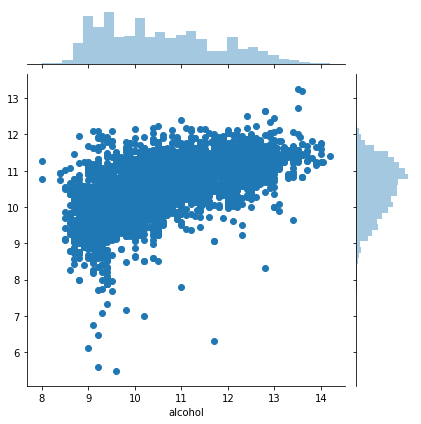

In [14]:
sns.jointplot(wines['alcohol'], model_sig.fittedvalues)

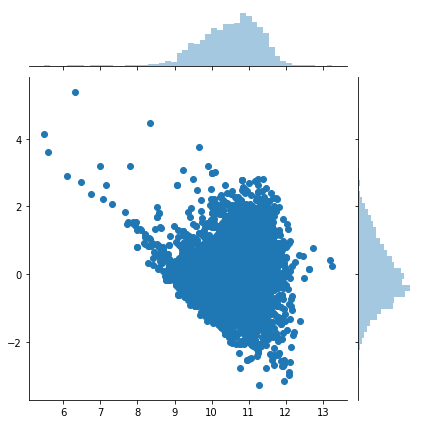

In [15]:
sns.jointplot(model_sig.fittedvalues, model_sig.resid)

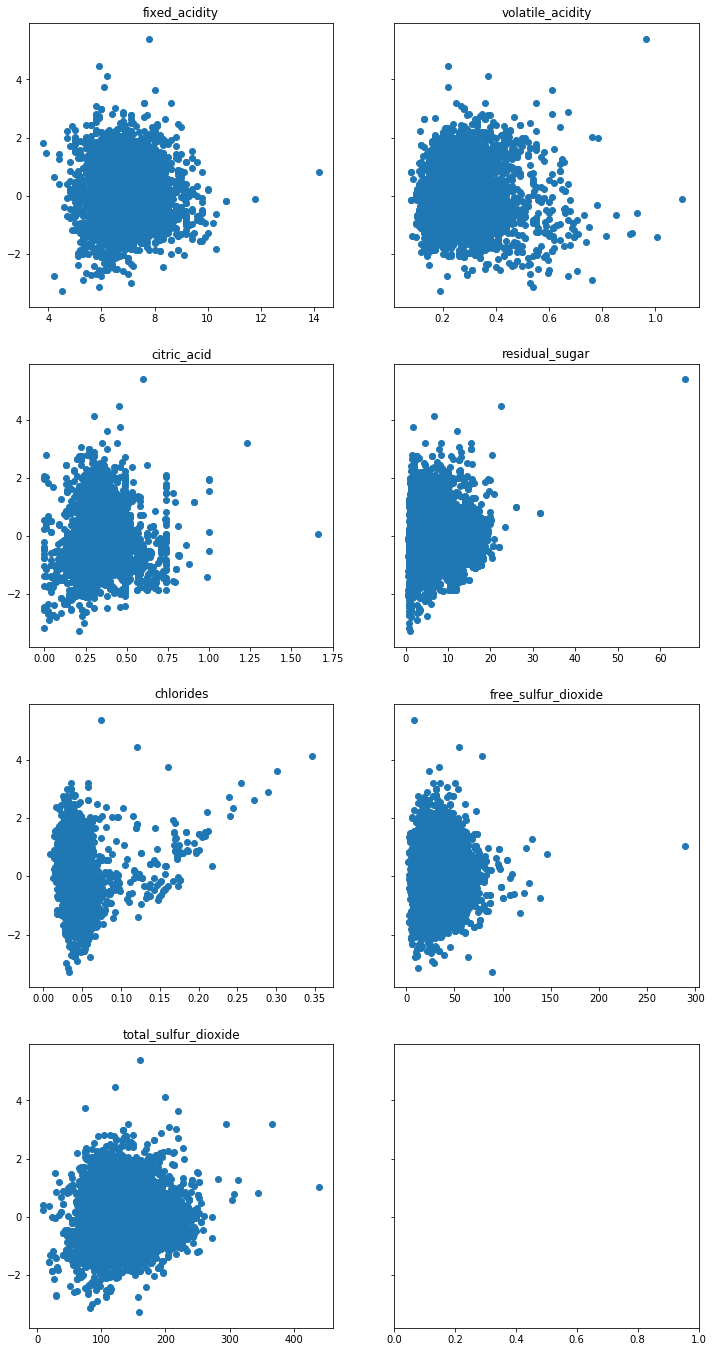

In [16]:
cols = [x for x in wines.columns if x not in cols_excluded]
n_rows = len(cols) // 2 + len(cols) % 2
fig, ax = plt.subplots(nrows=n_rows, ncols=2, sharey=True, figsize=(12, 6 * n_rows))
for idx, x in enumerate(cols):
    i, j = idx // 2, idx % 2
    ax[i, j].set_title(x)
    ax[i, j].scatter(wines[x], model_sig.resid)

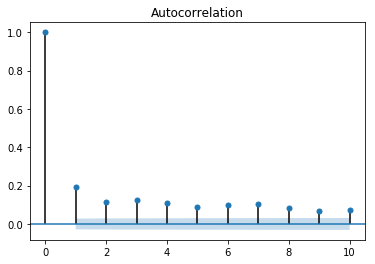

In [17]:
plot_acf(model_sig.resid, lags=10);

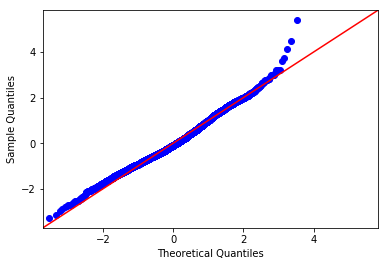

In [18]:
qqplot(model_sig.resid, line='45');